# Supervised learning- regression

Now that we know how to clean our data, we can start applying algorithms. In the assignment, you will further work on the real_estate dataset. But to learn the algorithms, we will use a very simple dataset, namely the 'scores'-dataset. This dataset contains the scores on the exam of 100 students and the amount of hours they spend studying. We will build a model to predict the score on the exam based on the amount of hours studying. (This is fictional data, please don't draw any conclusions on how many hours you have to study based on this.).

## 0. Loading packages and dataset

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('scores.csv')

The dataset is already cleaned, but not standardized yet. We will take a quick look at the data to get to know the dataset.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   hours   100 non-null    float64
 1   scores  100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [6]:
df.head(10)

,hours,scores
0,2.3,-0.4
1,12.1,3.7
2,17.5,12.6
3,5.4,-0.2
4,0.8,-0.8
5,15.5,12.2
6,11.8,2.2
7,17.6,12.5
8,11.4,3.9
9,6.6,1.3


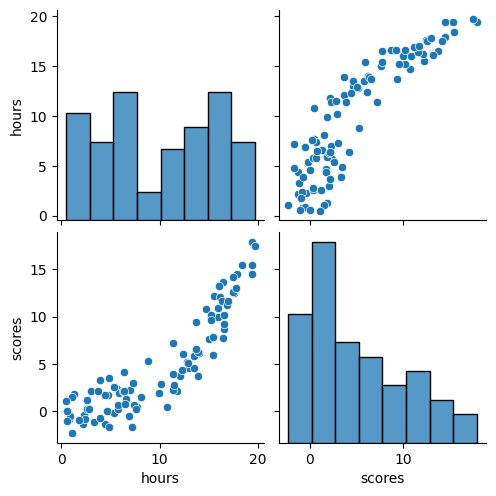

In [5]:
sns.pairplot(df)

Since we are interested in the association between hours and score, we also take a look at the scatterplot.

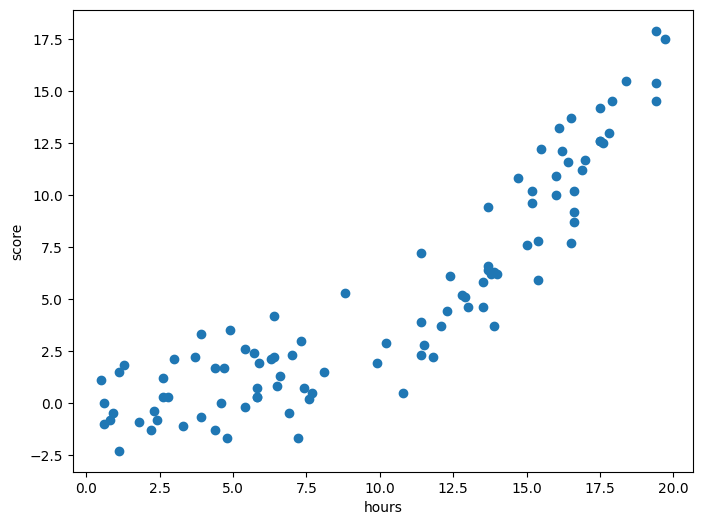

In [6]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.scatter(df.hours, df.scores);

ax.set_xlabel("hours");
ax.set_ylabel("score");

## 1. Linear regression

The first algorithm that every machine learner has to learn, is linear regression. Maybe, you have already heared about it in previous statistics classes or during secundary school? We will start with simple linear regression, where there is only 1 predictive feature. We will use 'property_tax' to try to predict the 'tx_price'. We first take a look at the scatterplot.

## 1.1 Training A simple linear model

First import the right function

In [7]:
from sklearn.linear_model import LinearRegression

Next define the object that will hold the model


In [8]:
reg = LinearRegression()

Next fit the model


In [9]:
reg.fit(np.array(df['hours']).reshape(-1, 1), df['scores'])

LinearRegression()

Pandas object werkt niet binnen .fit functie, heeft np.array nodig => transformeren via np.array

Now we predict all observations in our dataset and add these to our plot.

In [10]:
predictions_plot = reg.predict(np.arange(0,21).reshape(-1, 1))


predictions = reg.predict(np.array(df['hours']).reshape(-1, 1))


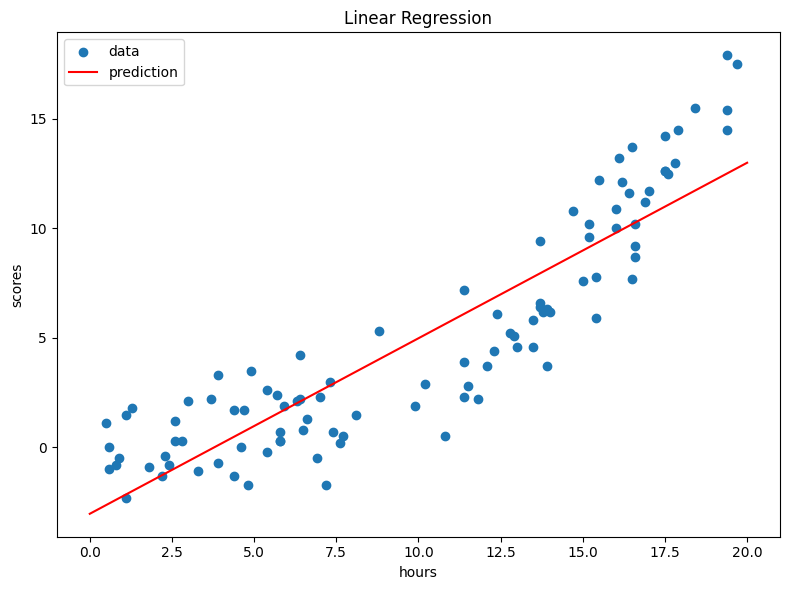

In [11]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(df.hours, df.scores, label='data')
plt.plot(np.arange(0,21), predictions_plot, c='r', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("Linear Regression")
ax.set_xlabel("hours");
ax.set_ylabel("scores");
plt.tight_layout()
plt.show()

We can ask for the values of the intercept and regressioncoefficient as follows:

In [12]:
[reg.intercept_, reg.coef_] 

[-3.0309007288672776, array([0.80122676])]

Terug naar slides gaan.

Now, let's evaluate how good our model is. We will ask python to compare the predictions with the true values.

In [13]:
from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error: %.3f"
      % mean_squared_error(df['scores'], predictions))

print('R2 score: %.2f' % r2_score(df['scores'], predictions))

print(reg.score(np.array(df['hours']).reshape(-1, 1), df['scores']))  # other way to get R^2

Mean squared error: 5.323
R2 score: 0.80
0.8018449956919473


## 1.2 Train-test split

Ok, we have a R2-value of 0.80. This means we can explain 80% of the variation in our model. But, wait, what did we just do? We evaluated our model on the same data the model was build upon. That is not fair! That's like taking an exam where you know the questions and answers up front. Offcourse, you are going to do well. If we want to be able to evaluate our model fairly, we ALWAYS need to set aside part of the data just for testing. This is called, the test-training split. Luckily, there is a function for this in python. It does require splitting up the features (X) and the target (y). 

In [14]:
# Import the function
from sklearn.model_selection import train_test_split

# shuffle the data first (to make sure the test set resembles the training set)

from random import Random
df_shuffle = df.sample(frac=1, random_state=40)


# Split of feaures and outcomes
X = df_shuffle['hours']
y = df_shuffle['scores']

# Perform train/test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# To simplify the code later on, we convert to a numpy-array here (only needed with 1 feature)
X_test = np.array(X_test).reshape(-1, 1)
X_train = np.array(X_train).reshape(-1, 1)


The 'test_size'-argument determines how much of the data is in the test-set. Here, this will be 20%. The random state sets a seed, to ensure that the split is done exactly the same every time we run this line of code.

Now we will retrain the model on the training dataset and test it on the test dataset.

In [15]:
reg.fit(X_train, y_train)

LinearRegression()

### 1.3 Evaluating the model
First, we make predictions for the test set. Now, we can compare these predictions with the true values

In [16]:
predictions = reg.predict(X_test)

### 1.3.1 Coefficient of determination

For illustration purposes, we also calculate the training reliability. (This can also help us to detect overfitting - see later)

In [17]:
reg.score(X_train, y_train)

0.826744926621057

In [18]:
reg.score(np.array(X_test).reshape(-1, 1), y_test)

0.6267388061321908

In [19]:
#alternative code
from sklearn.metrics import r2_score
r2_score(y_test, predictions)


0.6267388061321908

We see that the training R^2 is 81%, while the test R^2 is only 62.7%. This clearly shows that you have to use the test data to fairly evaluate your model. 

### 1.3.2 Mean absolute error


In [20]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, predictions)


2.4634071374139963

There is an error of 2.46 points for the exam.

### 1.3.3 Mean squared error

In [21]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, predictions)


7.481311434811884

It is always difficult to say if these models are good or bad. Is a MSE of 6.05 good or bad? That depends on the context. The quality measures are mainly used to compare different models to each other.

In our plot, we can clearly see that our model does not follow the real curve. We say that this model is underfitted: the model is not able to capture the patterns in the data. We will try to improve the model by using polynomials.

# 2. Polynomial regression

Doing polynomial regression in python is slightly inconvenient, since we have to design the features explicitly, rather than just call them through some function interface. However, the PolynomialFeatures library is a pretty powerful way of building higher orders quickly.

Before we take it a step further, we will first standardize the feature. Rembember to also transform the test dataset. This wil reduce the numeric values of the feature, which is highly important once exotic transformations will be applied 

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()




X_train_stan = scaler.fit_transform(X_train)

X_test_stan = scaler.transform(X_test)

## 2.1 quadratic

In [23]:
from sklearn.preprocessing import PolynomialFeatures

# First design the features

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_stan)
X_test_poly = poly.transform(X_test_stan)
print(X_train_poly)


[[ 1.00000000e+00  1.16748469e+00  1.36302050e+00]
 [ 1.00000000e+00  3.03171189e-01  9.19127701e-02]
 [ 1.00000000e+00  4.44283598e-01  1.97387915e-01]
 [ 1.00000000e+00  8.49981771e-01  7.22469011e-01]
 [ 1.00000000e+00 -3.19707800e-02  1.02213077e-03]
 [ 1.00000000e+00  1.64373907e+00  2.70187812e+00]
 [ 1.00000000e+00 -1.40781676e+00  1.98194803e+00]
 [ 1.00000000e+00 -1.05503574e+00  1.11310041e+00]
 [ 1.00000000e+00  1.59082191e+00  2.53071436e+00]
 [ 1.00000000e+00  8.85259873e-01  7.83685043e-01]
 [ 1.00000000e+00 -1.74295873e+00  3.03790513e+00]
 [ 1.00000000e+00  6.38313159e-01  4.07443689e-01]
 [ 1.00000000e+00 -9.84479535e-01  9.69199955e-01]
 [ 1.00000000e+00  1.79697832e-01  3.22913109e-02]
 [ 1.00000000e+00 -7.90449974e-01  6.24811161e-01]
 [ 1.00000000e+00 -7.02254719e-01  4.93161690e-01]
 [ 1.00000000e+00 -5.61142311e-01  3.14880693e-01]
 [ 1.00000000e+00 -2.78917494e-01  7.77949686e-02]
 [ 1.00000000e+00 -5.25864208e-01  2.76533166e-01]
 [ 1.00000000e+00  9.91094179e-

In our nex dataset, we have the intercept (the colomns of 1's), X (the second column) and X^2 (the third column).

In [24]:
# Then perform a linear regression on them. 
#Since the polynomial object already contains an intercept, we should drop it in the function call

reg_quad = LinearRegression(fit_intercept=False)
reg_quad.fit(X_train_poly, y_train)
print(reg_quad.score(X_train_poly, y_train))
print(reg_quad.score(X_test_poly, y_test))

0.9113051591435397
0.8306893052901165


Let's take a look at our plot now.

In [25]:
# Here, I predict all values between 0 and 20, which I will use in the plot
pred_input = poly.fit_transform(scaler.transform(np.arange(0,21).reshape(-1, 1)))
fit_reg_quad = reg_quad.predict(pred_input)



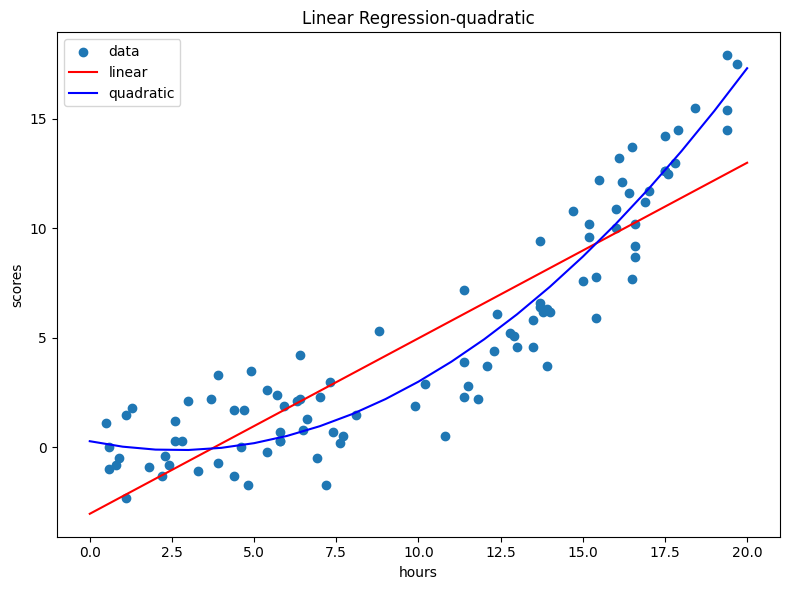

In [26]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(df.hours, df.scores, label='data')
plt.plot(np.arange(0,21), predictions_plot, c='r', label='linear')
plt.plot(np.arange(0,21), fit_reg_quad, c='b', label='quadratic')

plt.axis('tight')
plt.legend()
plt.title("Linear Regression-quadratic")
ax.set_xlabel("hours");
ax.set_ylabel("scores");
plt.tight_layout()
plt.show()

## 2.2 Higher order polynomial model

0.9237008733873132
0.8037352774999531


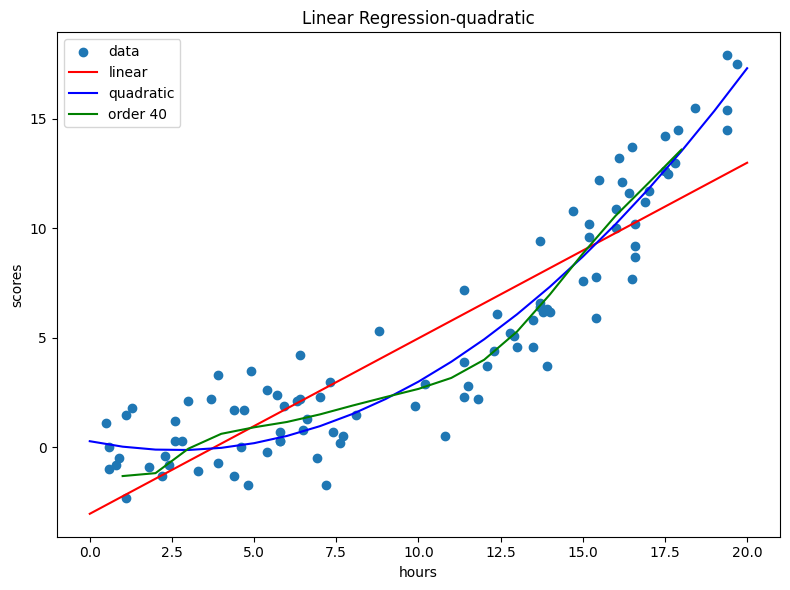

In [27]:
#play with the degree to see the effect of the order
poly = PolynomialFeatures(degree=10)
X_train_poly = poly.fit_transform(X_train_stan)
X_test_poly = poly.transform(X_test_stan)


# Then perform a linear regression on them. 
#Since the polynomial object already contains an intercept, we should drop it in the function call

reg_poly = LinearRegression(fit_intercept=False)
reg_poly.fit(X_train_poly, y_train)
print(reg_poly.score(X_train_poly, y_train))
print(reg_poly.score(X_test_poly, y_test))

#plot
pred_input = poly.fit_transform(scaler.transform(np.arange(1,19).reshape(-1, 1)))
fit_reg_poly = reg_poly.predict(pred_input)
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(df.hours, df.scores, label='data')
plt.plot(np.arange(0,21), predictions_plot, c='r', label='linear')
plt.plot(np.arange(0,21), fit_reg_quad, c='b', label='quadratic')
plt.plot(np.arange(1,19), fit_reg_poly, c='g', label='order 40')

plt.axis('tight')
plt.legend()
plt.title("Linear Regression-quadratic")
ax.set_xlabel("hours");
ax.set_ylabel("scores");
plt.tight_layout()
plt.show()


Did you notice that we had to perform every step on both the training and test dataset? If we would get a new dataset to predict, it would also need to go trough every step. Wouldn't it be much easier if we could do all of this in one go? This is exactly what pipelines do. So, we will make a pipeline that does the standardisation, designs the polynomial features and performs the linear regression 

In [28]:
from sklearn.pipeline import Pipeline
import numpy as np
reg_3 = Pipeline([('stand', StandardScaler()),
                  ('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression(fit_intercept=False))])

reg_3.fit(X_train, y_train)
print(reg_3.score(X_train,y_train))
print(reg_3.score(X_test,y_test))

0.9159773402878992
0.836092986232621


## 2.3 Cross-validation to select the best order
We will perform cross-validation to select the order that results in the best R2 in the test-set. We vary the order of the polynomial through a for-loop, but the mechanics of the cross-validation are not made explicit in a loop: they are hidden inside the cross_val_score function. In that function, the 5-fold cross-validation takes place, so 5 sets of test values are generated (we use 'r2' here to get the R2). We will print out the average of the 5 R2's.

In [29]:
from sklearn.model_selection import cross_val_score

avg_scores = [None] * 20

for i in np.arange(0,20):
    
    reg_poly = Pipeline([('stand', StandardScaler()),
                  ('poly', PolynomialFeatures(degree=i)),
                  ('linear', LinearRegression(fit_intercept=False))])
    
    scores = cross_val_score(reg_poly, X_train, y_train, scoring = 'r2', cv=5)
    
    avg_scores[i] = scores.mean()
    
    print("Order "+str(i)+": avg R^2 = "+str( avg_scores[i]))

Order 0: avg R^2 = -0.2538383511016077
Order 1: avg R^2 = 0.7759301380552068
Order 2: avg R^2 = 0.8874246619510266
Order 3: avg R^2 = 0.891708912762779
Order 4: avg R^2 = 0.8933321155075452
Order 5: avg R^2 = 0.8936443156249443
Order 6: avg R^2 = 0.8892350869144264
Order 7: avg R^2 = 0.88773393118153
Order 8: avg R^2 = 0.8820607511884994
Order 9: avg R^2 = 0.8819733383062331
Order 10: avg R^2 = 0.8699195237750013
Order 11: avg R^2 = 0.8512889337967383
Order 12: avg R^2 = 0.8535658199277105
Order 13: avg R^2 = 0.8390226571263583
Order 14: avg R^2 = 0.8686820755886353
Order 15: avg R^2 = -1.5246957255262363
Order 16: avg R^2 = -2.0884514693829597
Order 17: avg R^2 = 0.3727937109755426
Order 18: avg R^2 = -5.272744239455331
Order 19: avg R^2 = -10.05621385425791


We can also make a nice plot of these.

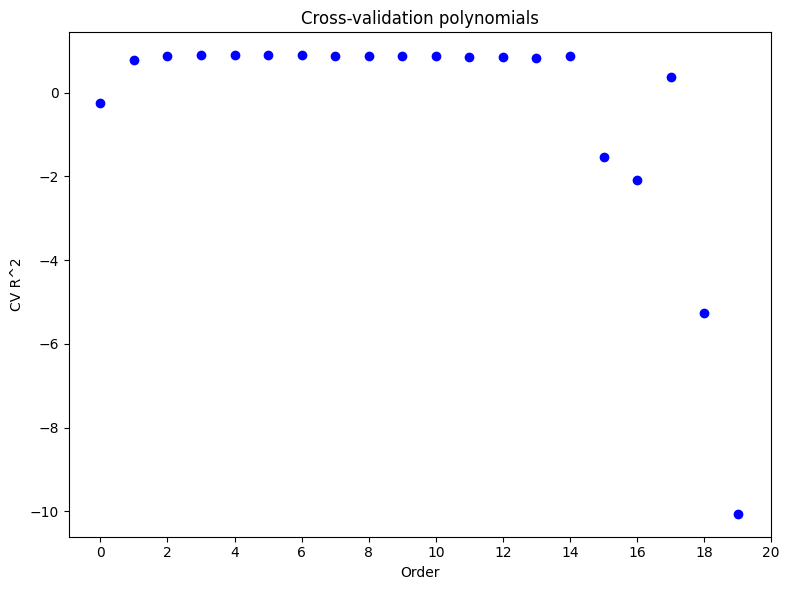

In [30]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(np.arange(0,20), avg_scores, c='b', label='data')
plt.axis('tight')
plt.title("Cross-validation polynomials")
plt.xticks([0,2,4,6,8,10,12,14,16,18,20])
ax.set_xlabel("Order");
ax.set_ylabel("CV R^2");
plt.tight_layout()
plt.show()

We can clearly see the overfitting from order 15 and higher. They perform very bad on the test set. Order 0 (just taking the average, is als not performing well (do to underfitting). I'm going to zoom in on the order 1 to 14 to get a better view.

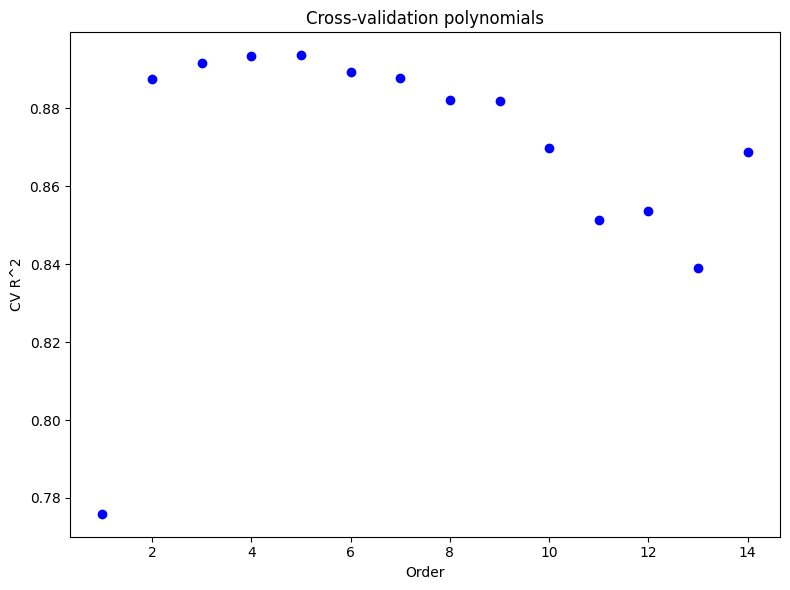

In [31]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(np.arange(1,15), avg_scores[1:15], c='b', label='data')
plt.axis('tight')
plt.title("Cross-validation polynomials")
ax.set_xlabel("Order");
ax.set_ylabel("CV R^2");
plt.tight_layout()
plt.show()

Now we can see that the best order  is between 2 and 7. A very common strategy is to add error bars, based on the standard error on the mean of the 5 cv values. You then take the lower error bar of the order with the best average R2, and subsequently find the lowest order (least complicated model) that has its average R2 above that bar.

The order with maximum R^2 is 5


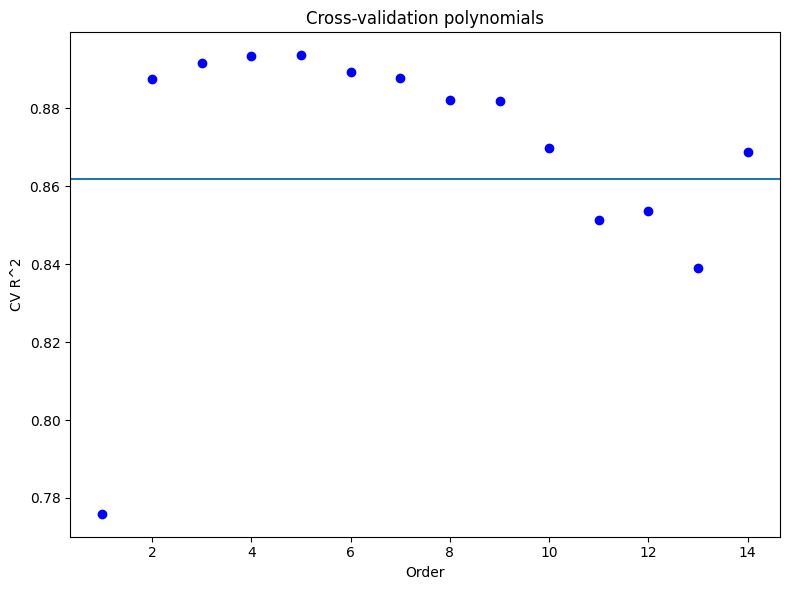

In [32]:
avg_scores = [None] * 20
sd_scores = [None] * 20
for i in np.arange(0,20):
    reg_poly = Pipeline([('stand', StandardScaler()),
                  ('poly', PolynomialFeatures(degree=i)),
                  ('linear', LinearRegression(fit_intercept=False))])
    
    scores = cross_val_score(reg_poly, X_train, y_train, scoring = 'r2', cv=5)

    avg_scores[i] = scores.mean()
    sd_scores[i] = np.sqrt(scores.var())/np.sqrt(5)
      
    
max_value = max(avg_scores)
max_index = avg_scores.index(max_value)
print('The order with maximum R^2 is '+str(max_index))
    
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(np.arange(1,15), avg_scores[1:15], c='b', label='data')
plt.axhline(y=max_value-1.96*sd_scores[max_index])
plt.axis('tight')
plt.title("Cross-validation polynomials")
ax.set_xlabel("Order");
ax.set_ylabel("CV R^2");
plt.tight_layout()
plt.show()

So, the conclusion?

The most optimal order is 5, but there's not a lot of evidence that order 2 is really much worse. And since that is a much simpler model, we could choose that.  


To not make things overly complicated, we will always just choose the optimal model (but I taught it was important to show you this procedure)


The validation score of the optimal model is:

In [33]:
scores.max()

0.8928724628217246

To wrap up, we retrain our model to the full trainingset and test this model on the test-set

In [34]:
reg_poly2 = Pipeline([('stand', StandardScaler()),
                  ('poly', PolynomialFeatures(degree=2)),
                  ('linear', LinearRegression(fit_intercept=False))])
reg_poly2.fit(X_train, y_train)
print(reg_poly2.score(X_train, y_train))
print(reg_poly2.score(X_test, y_test))

0.9113051591435397
0.8306893052901165


Note that if you would like to compare several algorithms (as we will do in the next class), you have to use the validation score and leave the test score till the end (till you have chosen your algorithm)

Congratulations, you have learned the basics of machine learning! In the next few classes, we will see some more algorithms, but the main idea of regularisation and cross-validation will remain the same.